# Lab Task 1: MNIST Fashion

---

## Introduction

Zalando, a fashion and technology company with a large presence in Dublin, have released MNIST Fashion, an alternative to the famous MNIST hand written digit classification dataset. The dataset contains 70,000 28x28 pixel grayscale images of fashion items of 10 different kinds: (0) T-shirt/top, (1) Trouser, (2) Pullover, (3) Dress, (4) Coat, (5) Sandal, (6) Shirt, (7) Sneaker, (8) Bag, and (9) Ankle boot. The task associated with this is to build a classification model that can recognise these different fashion items.

---

## TASKS

### Task 3

In [178]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [177]:
train_filename = "../Data/fashion-mnist_train.csv"
test_filename = "fashion_train_test/fashion-mnist_test.csv"
target_label = "label"

In [162]:
dataset = pd.read_csv(train_filename)
display(dataset.shape)
display(dataset.head())

(60000, 785)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
dataset[target_label].value_counts().sort_index()

label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

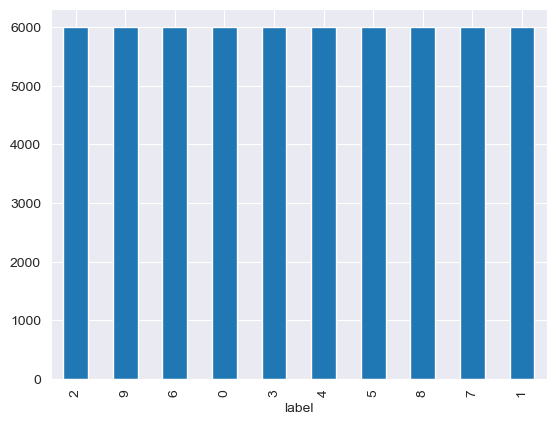

In [164]:
dataset[target_label].value_counts().plot(kind='bar')
plt.show()

In [165]:
print("Summary Stats")
display(dataset.select_dtypes(include=[np.number]).describe().transpose())

Summary Stats


,count,mean,std,min,25%,50%,75%,max
label,60000.0,4.500000,2.872305,0.0,2.0,4.5,7.0,9.0
pixel1,60000.0,0.000900,0.094689,0.0,0.0,0.0,0.0,16.0
pixel2,60000.0,0.006150,0.271011,0.0,0.0,0.0,0.0,36.0
pixel3,60000.0,0.035333,1.222324,0.0,0.0,0.0,0.0,226.0
pixel4,60000.0,0.101933,2.452871,0.0,0.0,0.0,0.0,164.0
...,...,...,...,...,...,...,...,...
pixel780,60000.0,17.911483,45.149388,0.0,0.0,0.0,0.0,255.0
pixel781,60000.0,8.520633,29.614859,0.0,0.0,0.0,0.0,255.0
pixel782,60000.0,2.753300,17.397652,0.0,0.0,0.0,0.0,255.0
pixel783,60000.0,0.855517,9.356960,0.0,0.0,0.0,0.0,255.0


In [166]:
print("Missing Values")
print(dataset.isnull().sum().sort_values(ascending=False))

Missing Values
label       0
pixel516    0
pixel518    0
pixel519    0
pixel520    0
           ..
pixel264    0
pixel265    0
pixel266    0
pixel267    0
pixel784    0
Length: 785, dtype: int64


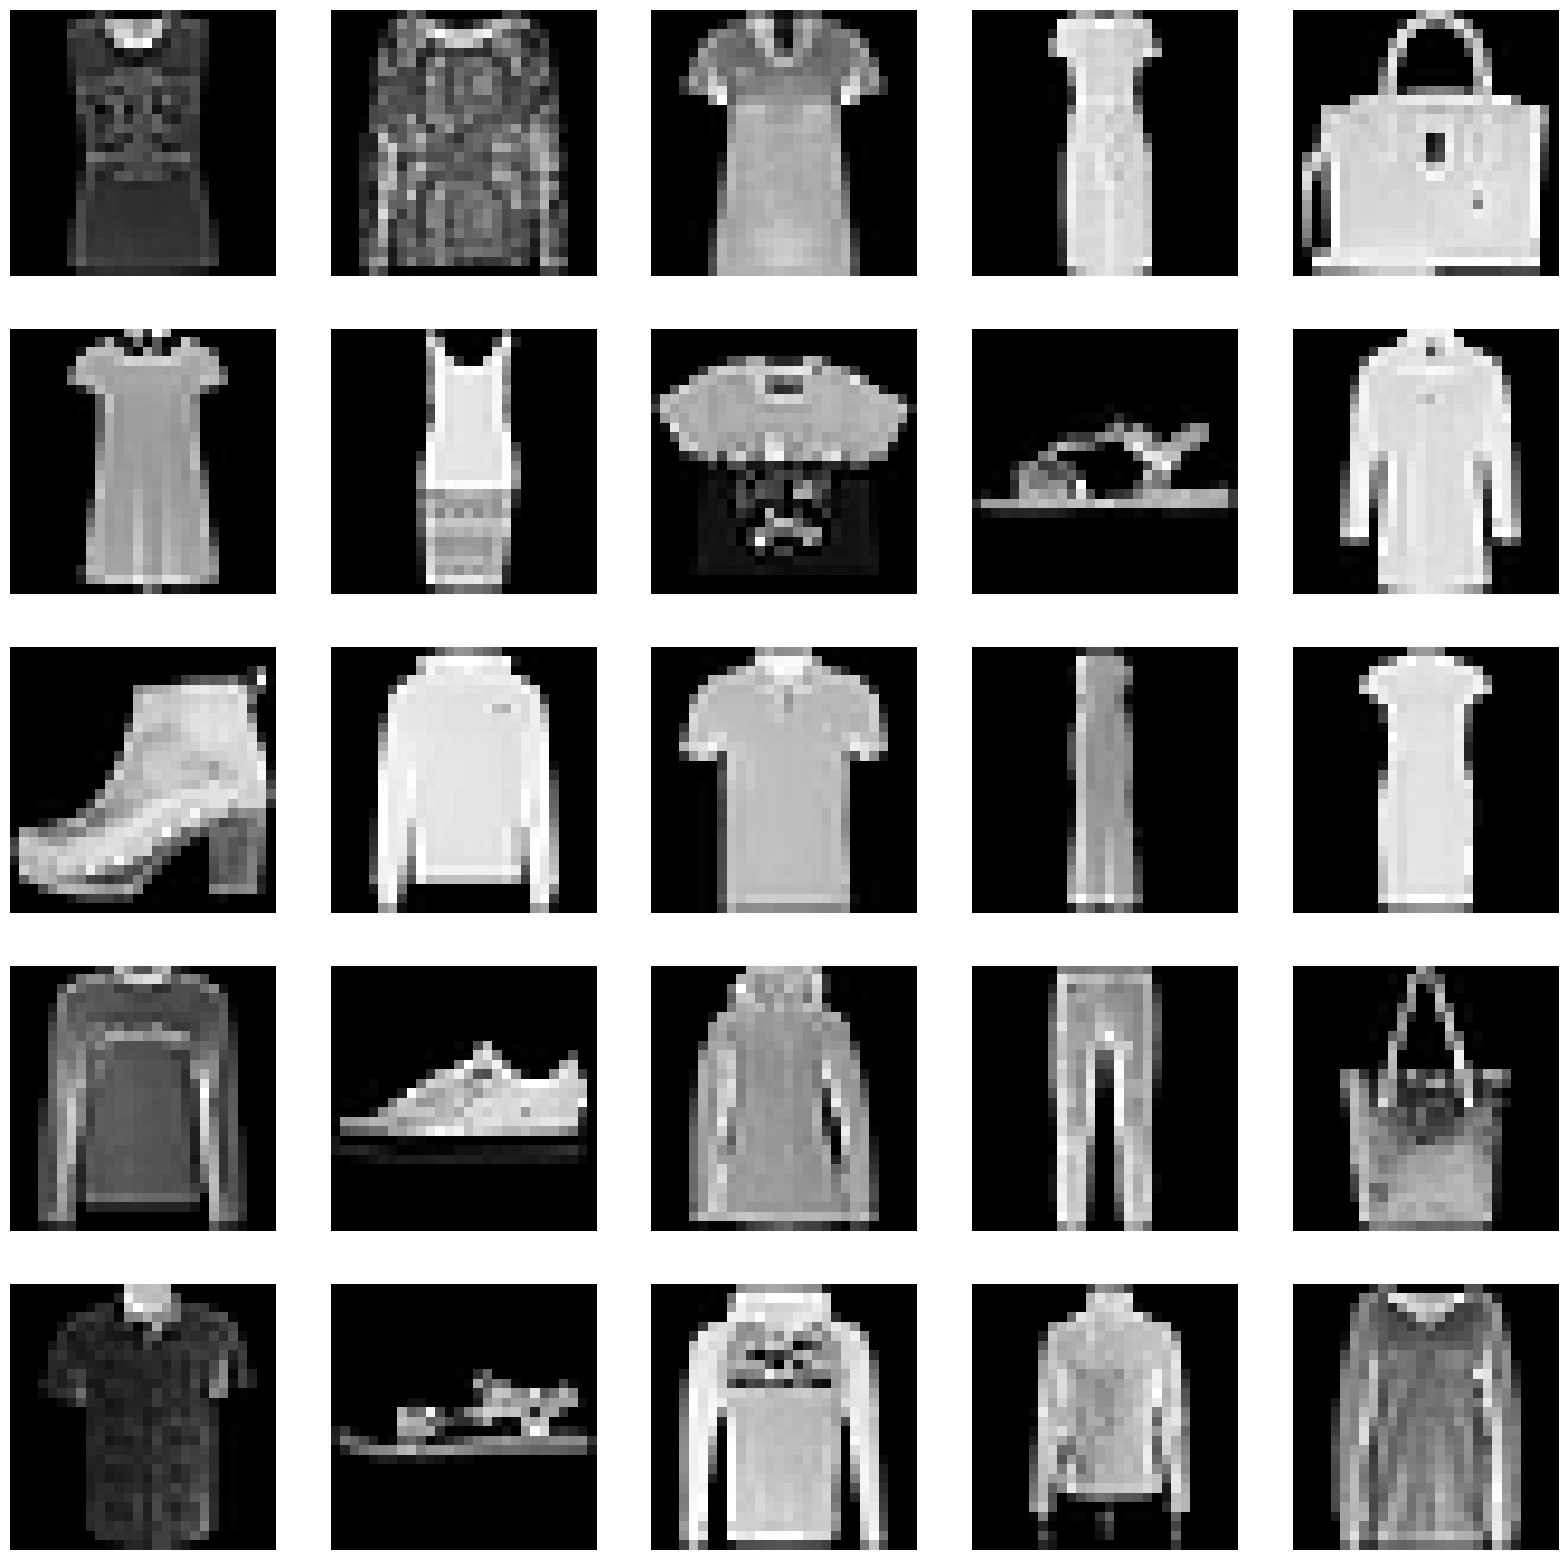

In [167]:
pltsize = 4
row_images = 5
col_images = 5
plt.figure(figsize=(col_images * pltsize, row_images * pltsize))

for i in range(row_images * col_images):
    i_rand = random.randint(0, dataset.shape[0])
    plt.subplot(row_images, col_images, i + 1)
    plt.axis('off')
    plt.imshow((dataset.iloc[i_rand, 1:]).values.reshape(28, 28), cmap='grey', vmin=0, vmax=256)
plt.show()

### Task 4

In [168]:
X = dataset[dataset.columns[1:]]
y = dataset[target_label]

In [169]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      shuffle=True,
                                                      stratify=y,
                                                      train_size=0.7)

### Task 5

In [170]:
my_tree = DecisionTreeClassifier(min_samples_split=0.05)
my_tree = my_tree.fit(X_train, y_train)

### Task 6

Accuracy: 0.7347777777777778
              precision    recall  f1-score   support

           0       0.65      0.83      0.73      1800
           1       0.91      0.90      0.91      1800
           2       0.67      0.57      0.62      1800
           3       0.75      0.72      0.73      1800
           4       0.58      0.72      0.64      1800
           5       0.74      0.80      0.77      1800
           6       0.54      0.40      0.46      1800
           7       0.79      0.81      0.80      1800
           8       0.88      0.74      0.80      1800
           9       0.87      0.85      0.86      1800

    accuracy                           0.73     18000
   macro avg       0.74      0.73      0.73     18000
weighted avg       0.74      0.73      0.73     18000

Confusion Matrix


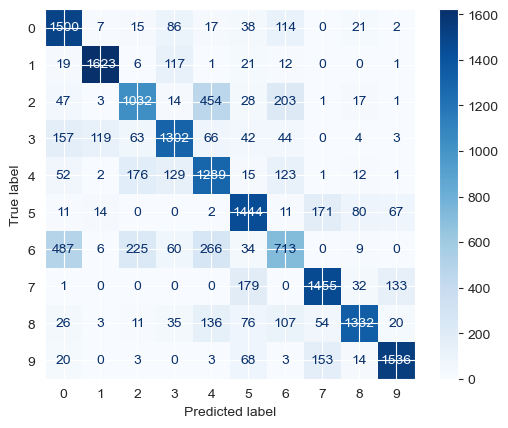

In [171]:
y_pred = my_tree.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy: " + str(accuracy))
print(classification_report(y_valid, y_pred))

print("Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(y_valid, y_pred, cmap='Blues')
plt.show()

### Task 7

In [172]:
param_grid = {
    'criterion': ['gini', "entropy"],
    'max_depth': list(range(5, 50, 5)),
    'min_samples_split': [50]
}

my_tuned_tree = GridSearchCV(my_tree, param_grid, cv=5, n_jobs=-1)
my_tuned_tree.fit(X, y)

print("Best parameters set found on development set:")
display(my_tuned_tree.best_params_)
display(my_tuned_tree.best_score_)

Best parameters set found on development set:


{'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 50}

0.8128666666666666

### Task 8

In [173]:
param_grid = [{
    'n_estimators': list(range(100, 301, 50)),
    'max_features': list(range(2, 10, 3)),
    'min_samples_split': [200]
}]

my_tuned_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
my_tuned_rf.fit(X, y)

print("Best parameters set found on development set:")
print(my_tuned_rf.best_params_)
print(my_tuned_rf.best_score_)

Best parameters set found on development set:
{'max_features': 8, 'min_samples_split': 200, 'n_estimators': 200}
0.84465


### Task 9

In [179]:
X_train = (X_train / 255 * 2) - 1
X_valid = (X_valid / 255 * 2) - 1

In [180]:
best_model = RandomForestClassifier(**my_tuned_rf.best_params_)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_features=8, min_samples_split=200, n_estimators=200)

Accuracy: 0.8433333333333334
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1800
           1       0.99      0.94      0.97      1800
           2       0.72      0.76      0.74      1800
           3       0.80      0.92      0.85      1800
           4       0.71      0.79      0.75      1800
           5       0.95      0.94      0.94      1800
           6       0.73      0.45      0.56      1800
           7       0.91      0.90      0.90      1800
           8       0.94      0.96      0.95      1800
           9       0.92      0.93      0.93      1800

    accuracy                           0.84     18000
   macro avg       0.84      0.84      0.84     18000
weighted avg       0.84      0.84      0.84     18000

Confusion Matrix


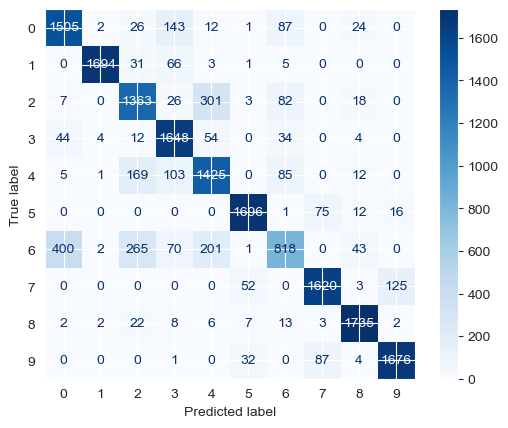

In [182]:
y_pred = best_model.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy: " + str(accuracy))
print(classification_report(y_valid, y_pred))

print("Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(y_valid, y_pred, cmap='Blues')
plt.show()

### Task 11

In [185]:
train_dataset = pd.read_csv(train_filename)
test_dataset = pd.read_csv(test_filename)
display(train_dataset.shape, test_dataset.shape)

(60000, 785)

(10000, 785)

In [186]:
X_train = train_dataset[train_dataset.columns[1:]]
y_train = train_dataset[target_label]

X_test = test_dataset[test_dataset.columns[1:]]
y_test = test_dataset[target_label]

X_train = (X_train / 255 * 2) - 1
X_test = (X_test / 255 * 2) - 1

In [187]:
best_model = RandomForestClassifier(**my_tuned_rf.best_params_)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_features=8, min_samples_split=200, n_estimators=200)

Accuracy: 0.8504
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1000
           1       0.98      0.95      0.96      1000
           2       0.75      0.78      0.76      1000
           3       0.83      0.92      0.87      1000
           4       0.75      0.82      0.78      1000
           5       0.96      0.93      0.94      1000
           6       0.74      0.49      0.59      1000
           7       0.90      0.90      0.90      1000
           8       0.93      0.97      0.95      1000
           9       0.91      0.93      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Confusion Matrix


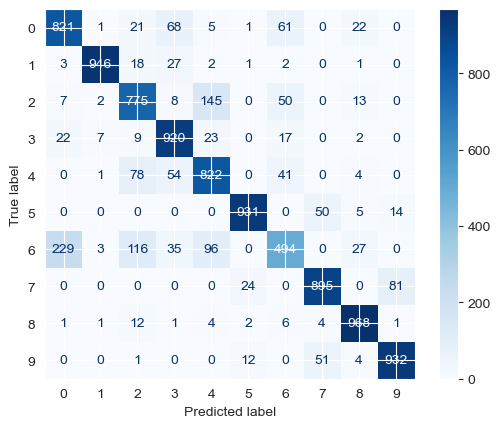

In [188]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(accuracy))
print(classification_report(y_test, y_pred))

print("Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()